# Algorithm for Indexing Points Cloud of a Rope
- Author: Xingjian Zhang (jimmyzxj@umich.edu)

**Summary**
- Build a discrete graph from the geometric data.
- Simulate a heat diffusion on the graph from one end (src, high temperature)
to another end (dst, low temperature).
- The indexing are obtained by sorting the
"temperature" of each node.

Suppose we have $n$ points in total.

## Step 1: Graph Construction
1. Each point is a node in the graph.
2. The edge of two nodes $x,y$ is given by a function $\rho: \mathbb{R}^2\to
   [0, 1]$
   $$ \rho(x, y) = \exp\left(-\dfrac{\| x - y \|^2}{2\sigma^2}\right) $$
3. $\sigma$ is a parameter defined by
   $$ \sigma = \dfrac{1}{n}\sum_{i=1,\dots, n} \min_{j\neq i} \|x_i - x_j\| $$
   (Intuition: $\sigma$ is approximately the average distance between two adjacent points.)
4. Given step 2 and 3, we can construct the adjacency matrix $A$ of the graph,
   which should be a symmetric and sparse matrix (plotted below). Notice that
   the diagonal entries of $A$ are defined to be 0.

## Step 2: Heat Diffusion
1. We assume that the the beginning and ending point of the rope is given by
   $src$ and $dst$. (This is not necessary but it makes the algorithm easier to
   implement. We will show how to find $src$ and $dst$ in the next section.)
2. Compute the *diffusion matrix* (normalized adjacency matrix) $W$ by
   $$ W = D^{-1}A $$
   where $D$ is the diagonal matrix with $D_{ii} = \sum_j A_{ij}$.
3. Define the temperature distribution as a vector $f^t\in \mathbb{R}^n$ with respect to
   step/time $t$. The boundary condition is given by $f^t_{src} = 1$ and
   $f^t_{dst} = 0$.
4. The heat diffusion is given by
   $$ f^{t+1} = Wf^t $$
   and then set
   $$ f^{t+1}_{src} = 1, f^{t+1}_{dst} = 0 $$
5. Repeat step 4 until convergence, for example, $\|f^{t+1} - f^t\| < \epsilon$.

## Step 3: Indexing
1. Sort the nodes by the temperature $f^t$ in descending order.
2. The index of the nodes are given by the sorted order.

## What if we do not know the beginning and ending point?
We can find the beginning and ending point by performing two heat diffusion
simulations with a few steps. (not implemented yet)

1. Select a random point $i$ as the beginning point and perform the heat
   diffusion simulation for $k$ steps. (set $f^t_i = 1$ as the boundary
   condition) $k$ is a hyperparameter and can be set as $\sqrt{n}$ for
   simplicity.
2. Find the node $j$ with the lowest temperature and set it as the new beginning
   point $src$. i.e. Set $f^t_{src} = 1$ as the new boundary condition and
   perform another heat diffusion simulation for $k$ steps.
3. Find the node $j'$ with the lowest temperature and set it as the ending
   point $dst$.

# Algorithm for Indexing Points Cloud of a Rope
- Author: Xingjian Zhang (jimmyzxj@umich.edu)

**Summary**
- Build a discrete graph from the geometric data.
- Simulate a heat diffusion on the graph from one end (src, high temperature)
to another end (dst, low temperature).
- The indexing are obtained by sorting the
"temperature" of each node.

Suppose we have $n$ points in total.

## Step 1: Graph Construction
1. Each point is a node in the graph.
2. The edge of two nodes $x,y$ is given by a function $\rho: \mathbb{R}^2\to
   [0, 1]$
   $$ \rho(x, y) = \exp\left(-\dfrac{\| x - y \|^2}{2\sigma^2}\right) $$
3. $\sigma$ is a parameter defined by
   $$ \sigma = \dfrac{1}{n}\sum_{i=1,\dots, n} \min_{j\neq i} \|x_i - x_j\| $$
   (Intuition: $\sigma$ is approximately the average distance between two adjacent points.)
4. Given step 2 and 3, we can construct the adjacency matrix $A$ of the graph,
   which should be a symmetric and sparse matrix (plotted below). Notice that
   the diagonal entries of $A$ are defined to be 0.

## Step 2: Heat Diffusion
1. We assume that the the beginning and ending point of the rope is given by
   $src$ and $dst$. (This is not necessary but it makes the algorithm easier to
   implement. We will show how to find $src$ and $dst$ in the next section.)
2. Compute the *diffusion matrix* (normalized adjacency matrix) $W$ by
   $$ W = D^{-1}A $$
   where $D$ is the diagonal matrix with $D_{ii} = \sum_j A_{ij}$.
3. Define the temperature distribution as a vector $f^t\in \mathbb{R}^n$ with respect to
   step/time $t$. The boundary condition is given by $f^t_{src} = 1$ and
   $f^t_{dst} = 0$.
4. The heat diffusion is given by
   $$ f^{t+1} = Wf^t $$
   and then set
   $$ f^{t+1}_{src} = 1, f^{t+1}_{dst} = 0 $$
5. Repeat step 4 until convergence, for example, $\|f^{t+1} - f^t\| < \epsilon$.

## Step 3: Indexing
1. Sort the nodes by the temperature $f^t$ in descending order.
2. The index of the nodes are given by the sorted order.

## What if we do not know the beginning and ending point?
We can find the beginning and ending point by performing two heat diffusion
simulations with a few steps. (not implemented yet)

1. Select a random point $i$ as the beginning point and perform the heat
   diffusion simulation for $k$ steps. (set $f^t_i = 1$ as the boundary
   condition) $k$ is a hyperparameter and can be set as $\sqrt{n}$ for
   simplicity.
2. Find the node $j$ with the lowest temperature and set it as the new beginning
   point $src$. i.e. Set $f^t_{src} = 1$ as the new boundary condition and
   perform another heat diffusion simulation for $k$ steps.
3. Find the node $j'$ with the lowest temperature and set it as the ending
   point $dst$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load('./gmm.npy')

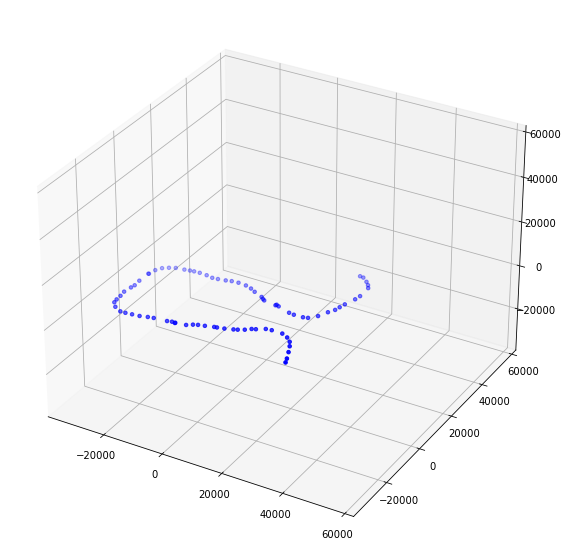

In [9]:
# plot 3d data, find the src and dst
lims = [np.min(data), np.max(data)]
std_data = data - data.mean(axis=0)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(90, 0)
ax.set_xlim(*lims)
ax.set_ylim(*lims)
ax.set_zlim(*lims)
ax.scatter(std_data[:, 0], std_data[:, 1], std_data[:, 2], s=50, c='b', marker='.')
# for i in range(len(data)):
#     ax.text(std_data[i, 0], std_data[i, 1], std_data[i, 2], str(i))
plt.show()

In [46]:
# create graph for data
def edge_weight_fn(x, y, sigma=1.0):
    dist = np.linalg.norm(x - y)
    weight = np.exp(-dist**2/(2*sigma**2))

    return weight

def create_graph(data, edge_weight_fn):
    n = len(data)
    graph = np.zeros((n, n))
    data = data - data.mean(axis=0)

    # compute the min distance between a point and its nearest neighbor
    # this is used to set sigma
    min_dists = []
    for i in range(n):
        min_dist = np.inf
        for j in range(n):
            if i != j:
                dist = np.linalg.norm(data[i] - data[j])
                if dist < min_dist:
                    min_dist = dist
        min_dists.append(min_dist)
    sigma = np.mean(np.array(min_dists))

    for i in range(n):
        for j in range(i+1, n):
            graph[i, j] = edge_weight_fn(data[i], data[j], sigma)
            graph[j, i] = graph[i, j]

    return graph

g = create_graph(data, edge_weight_fn)

Below is a numpy acceleration version of the above code.
The functionality is the same but the speed is much faster.

In [4]:
# create graph for data
def edge_weight_fn(distances, sigma=1.0):
    weights = np.exp(-distances**2/(2*sigma**2))
    return weights

def create_graph(data, edge_weight_fn):
    data = data - data.mean(axis=0)

    # compute the pairwise distance matrix using broadcasting
    sum_square = np.sum(data**2, axis=1)
    dist_matrix = np.sqrt(sum_square[:, None] + sum_square[None, :] - 2 * np.dot(data, data.T))

    # compute the min distance between a point and its nearest neighbor
    # this is used to set sigma
    min_dists = np.partition(dist_matrix, 1, axis=1)[:,1]
    sigma = np.mean(min_dists)

    # compute edge weights
    graph = edge_weight_fn(dist_matrix, sigma)
    np.fill_diagonal(graph, 0)

    return graph

g = create_graph(data, edge_weight_fn)

/var/folders/p_/9nsj79ws513903c60xqvb5r80000gn/T/ipykernel_65295/1897593382.py:11: RuntimeWarning: invalid value encountered in sqrt
  dist_matrix = np.sqrt(sum_square[:, None] + sum_square[None, :] - 2 * np.dot(data, data.T))


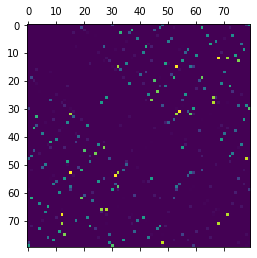

In [19]:
# plot adjacency matrix of g as image
plt.matshow(g)

In [45]:
from time import time

def graph_diffuse(g, data, tol=1e-4, src=24, dst=40):
    start_time = time()
    heat_distribution = np.zeros(g.shape[0])
    heat_distribution[src] = 1
    degree_matrix = np.diag(np.sum(g, axis=1))
    adj_matrix = g
    normalized_adj_matrix = np.linalg.inv(degree_matrix) @ adj_matrix
    delta_heat = 1
    last_heat_distribution = heat_distribution
    n_iter = 0
            
    while delta_heat > tol:
        heat_distribution = normalized_adj_matrix @ heat_distribution
        heat_distribution[src] = 1
        heat_distribution[dst] = 0
        delta_heat = np.linalg.norm(heat_distribution - last_heat_distribution)
        last_heat_distribution = heat_distribution
        n_iter += 1
    
    end_time = time()
    print(f"Converged after {n_iter} iterations in {end_time - start_time:.2f} seconds")
    
    rank = np.argsort(heat_distribution)
    idx_to_rank = np.zeros(len(rank), dtype=np.int32)
    for i in range(len(rank)):
        idx_to_rank[rank[i]] = i
    lims = [np.min(data), np.max(data)]
    std_data = data - data.mean(axis=0)
    fig = plt.figure(figsize=(15, 15))
    # observation from above
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(90, 0)
    ax.set_xlim(*lims)
    ax.set_ylim(*lims)
    ax.set_zlim(*lims)
    # rank the data points according to heat distribution
    ax.scatter(std_data[:, 0], std_data[:, 1], std_data[:, 2], s=50, c=heat_distribution, marker='o')
    for i in range(len(data)):
        ax.text(std_data[i, 0], std_data[i, 1], std_data[i, 2], f"{idx_to_rank[i]}")
        # ax.text(std_data[i, 0], std_data[i, 1], std_data[i, 2], f"{idx_to_rank[i]} ({heat_distribution[i]:.2f})")
    # color data points according to heat distribution(laels)
    # add line between neighbors
    for i in range(len(data)-1):
        src_i, dst_i = rank[i], rank[i+1]
        ax.plot([std_data[src_i, 0], std_data[dst_i, 0]],
                [std_data[src_i, 1], std_data[dst_i, 1]],
                [std_data[src_i, 2], std_data[dst_i, 2]], c='r')
    plt.show()

Converged after 400 iterations in 0.04 seconds


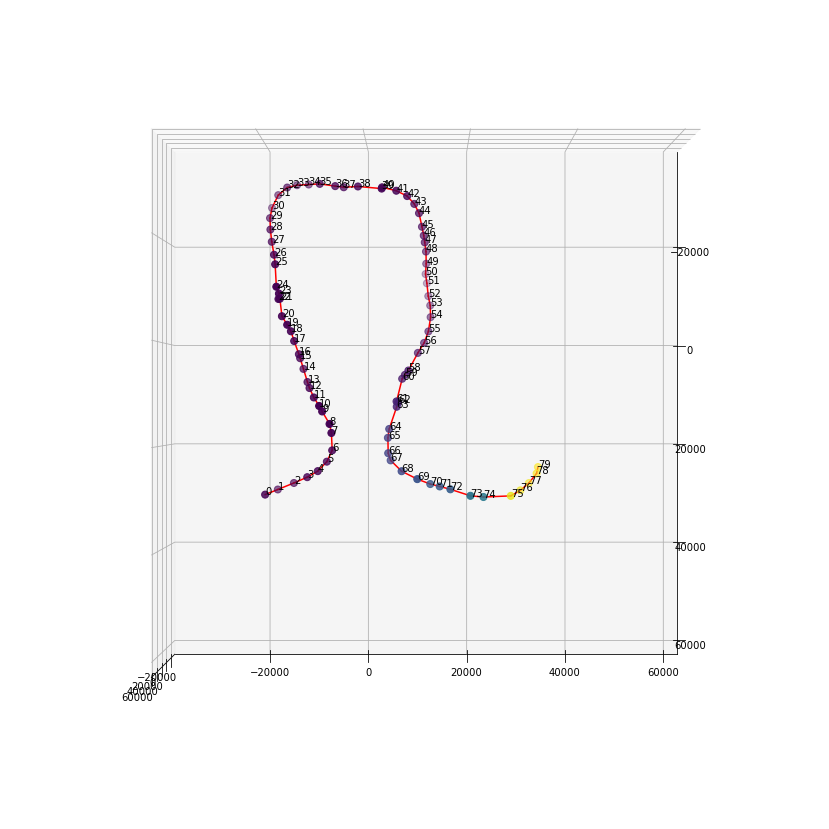

In [46]:
n_nodes = g.shape[0]
tol = 0.1 / n_nodes
graph_diffuse(g, data, tol=tol, src=24, dst=40)